### Introduction


This case study examines the outcomes of an A/B test conducted using a sample data to evaluate the effectiveness of an email marketing campaign for a fictional subscription-based company. **The goal is to measure the Lift (percentage increase or decrease) in conversion rates of the B-variant (personalized emails) compared to the A-variant (baseline boilerplate emails)**.

### Problem Definition
The marketing team gathered data from January 1st to January 31st to analyze the performance of two email variants:

    * A-variant (control): Standard / default marketing email.
    * B-variant (personalized): Email tailored to users' usage statistics and interactions with the product.
    
The objective is to calculate the lift in conversion rates across different population segments (language and age group) and evaluate statistical significance to make actionable recommendations.

### Hypothesis:
Personalized email marketing (B-variant) will lead to higher subscriber conversions compared to regular marketing emails (A-variant).

### Findings:

Language Segmentation:

* Spanish users: **166% increase** in conversion rate.
* English users: **39% increase** in conversion rate.
* Arabic and German users: No statistically significant results.

Age Group Segmentation:
* 0–18 years  :  **121%**  increase
* 19–24 years :  **106.24%** increase
* 24–30 years :  **161%** increase
* 30–36 years :  **-100%** decrease
* 36–45 years :  **-85%** decrease
* 45–55 years :  **-72%** decrease
* 55+ years   :  **-100%** decrease

### Summary of Findings:

> Statistically significant increases in conversion rates were observed for **Spanish and English** speakers who received the B-variant.
> No statistically significant impact for Arabic and German speakers.
> Conversion rates improved significantly for individuals in **age groups (0–30)**, while those in age groups (30–55+) experienced significant declines in performance with the B-variant.


### Final Recommendations

_**Language Segmentation:**_
> * Continue personalized email campaigns for Spanish and English speakers.
> * Discontinue personalized campaigns for Arabic and German speakers due to lack of significant results.

_**Age Group Segmentation:**_
> * Focus on personalized campaigns for individuals in age groups (0–30 years) where effectiveness is high.
> * Discontinue or maybe improvise further the personalized emails for individuals in age groups (30–55+ years) to improve conversions.

_**Combined Targeting (Language + Age):**_
> Target Spanish and English speakers in the 0–30 age group with personalized emails for maximum effectiveness.

### Statistical Analysis  **

In [22]:
# Importing essential libraries:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind

In [23]:
# Reading the data & isolating the rows where the channel is Email

marketing = pd.read_csv('marketing.csv', parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
email = marketing[marketing['marketing_channel'] == 'Email']

email.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaT,Email,True
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaT,Email,True
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaT,Email,True
366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,2018-01-13,2018-01-23,Email,False
370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,2018-01-17,2018-02-12,Email,False


##### Answering some common questions relating to data:

In [24]:
# When was the A/B test run and for how long?
print(marketing['date_served'].min(), marketing['date_served'].max())


2018-01-01 00:00:00 2018-01-31 00:00:00


In [95]:
# On how many users the A/B test was conducted?
email['user_id'].nunique()

553

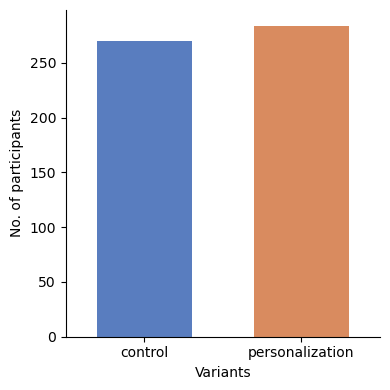

In [204]:
# What is the variant distribution?  
var_split = email.groupby(['variant'])['user_id'].agg([('count', 'nunique')]).reset_index()

# personalization = 284, control = 270

pl = sns.catplot(data = var_split, kind = 'bar', x = 'variant', y = 'count', height=4, aspect=1, width=0.6, palette = 'muted')
pl.set(xlabel = 'Variants', ylabel = 'No. of participants')
plt.show()

In [108]:
# Comparing the conversion_rate of both variants 

subscribers = email.groupby(['user_id', 'variant'])['converted'].max()

subscribers_df = pd.DataFrame(subscribers.unstack(level = 1))

control = subscribers_df['control'].dropna()

personalization = subscribers_df['personalization'].dropna()


In [109]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### Calculating Lift and Statistical Significance

**Lift is the difference between the A and B conversion rates divided by B conversion rate. In this case it would be:**

\begin{equation*}
\text{Lift} = \frac{\text{Personalized conversion rate - Control conversion rate}}{\text{Control conversion rate}}
\end{equation*}



##### Why are we calculating Lift? 

> **Lift is a crucial metric for A/B testing in email campaign analysis** because it measures the relative improvement (or decline) in performance when transitioning from one variant to another. Specifically, lift evaluates the impact of the "B variant" (personalized emails) compared to the "A variant" (baseline emails). 

Here's why we calculate lift in this context:

1. **Quantifies Campaign Effectiveness**
       
       Provides a percentage-based comparison of conversion rates between the two email variants.

2. **Validates Hypotheses**

       In A/B testing, there is often a hypothesis that personalization will outperform a generic approach. Lift is used to validate this hypothesis. If the lift is positive, it means the personalized emails increased conversions. If negative, it indicates that the personalized approach was less effective.

3. **Helps Stakeholders Make Data-Driven Decisions**
     
       By calculating lift, stakeholders can decide whether to implement the new strategy (B variant) across all users or 
       to refine it further.

4. **Relative Performance Assessment**

       Lift expresses the performance change in percentage terms, making small differences more interpretable.

5. **Optimization for Future Campaigns**

       Knowing the lift for specific segments (e.g., age groups, languages) allows for tailored campaigns that maximize ROI in future marketing efforts.

6. **Statistical Validation**

       Lift combined with statistical tests provides evidence that the observed changes are not due to random chance but 
       are statistically significant.

In [104]:
# Calculating the mean conversion rate of control and personalization groups
a_mean = np.mean(control)
b_mean = np.mean(personalization)

# Calculating the lift
lift = (b_mean - a_mean) / a_mean

print("Lift:", str(round(lift*100,2)) + '%')

lift: 38.85%


**_Statistical significance is vital to understand if a test showed positive result by chance or if it's reflective of a true difference between variants_**

In [111]:
t = ttest_ind(control, personalization)
print(t)

TtestResult(statistic=-2.734329944750507, pvalue=0.006451487844694182, df=552.0)


_Given that p is 0.006, we can conclude that the results are statistically significant_

### Building an A/B test segmentation function

In [218]:
def ab_seg_func(segment):
    
    # Looping through each subsegment of segment in marketing

    for subsegment in np.unique(marketing[segment].values):
        print(subsegment)
        
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]
        
        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack())
        
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()
        
        a_mean = np.mean(control)
        b_mean = np.mean(personalization)
        
        lift = (b_mean - a_mean)/ a_mean
        
        control = pd.to_numeric(control, errors='coerce')
        personalization = pd.to_numeric(personalization, errors='coerce')

        print('Lift:', str(round(lift*100, 2)) + '%')
        
        # Performing t-test
        t_test = ttest_ind(control, personalization)

        # Defining a lambda function to format and print test results
        t_result = lambda t: f'statistic: {t.statistic.round(4)}, p-value: {t.pvalue.round(5)}'

        print(t_result(t_test), '\n\n')
    

##### A/B testing by language 

In [219]:
ab_seg_func('language_displayed')

Arabic
Lift: 50.0%
statistic: -0.5774, p-value: 0.57958 


English
Lift: 39.0%
statistic: -2.2184, p-value: 0.02699 


German
Lift: -1.62%
statistic: 0.191, p-value: 0.84944 


Spanish
Lift: 166.67%
statistic: -2.357, p-value: 0.04016 




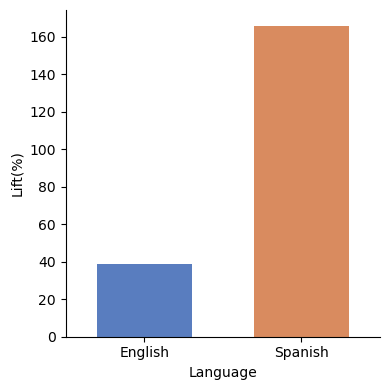

In [221]:
# Put information into list
lang = {
    'language': ['English', 'Spanish'],
    'pct': [39, 166]} 

# Create df
p_lang = pd.DataFrame(lang)

# Create plot
p2 = sns.catplot(data = p_lang, kind = 'bar', y = 'pct', x = 'language', palette = 'muted', height=4, aspect=1, width=0.6)
p2.set(ylabel = 'Lift(%)', xlabel = 'Language')
plt.show()

##### A/B testing by age_group

In [158]:
ab_seg_func('age_group')

0-18 years
Lift: 121.4%
statistic: -2.966, p-value: 0.00387 


19-24 years
Lift: 106.24%
statistic: -3.0318, p-value: 0.00306 


24-30 years
Lift: 161.19%
statistic: -3.8615, p-value: 0.00019 


30-36 years
Lift: -100.0%
statistic: 3.1859, p-value: 0.00232 


36-45 years
Lift: -85.23%
statistic: 2.4318, p-value: 0.01798 


45-55 years
Lift: -72.22%
statistic: 2.0655, p-value: 0.04306 


55+ years
Lift: -100.0%
statistic: 3.3266, p-value: 0.00164 




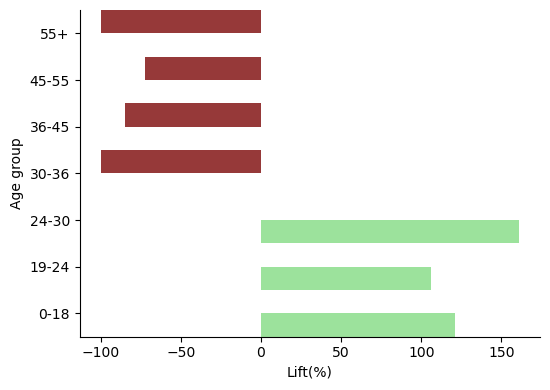

In [222]:
# Put information into list
age_pct = {
    'age_group': ['55+', '45-55', '36-45', '30-36', '24-30', '19-24', '0-18'],
    'pct': [-100, -72, -85, -100, 161, 106, 121]}

# Create df
p_age = pd.DataFrame(age_pct)

p_age['positive'] = np.where(p_age['pct']>0, 'yes', 'no')

# Create plot
colors = {'yes': 'lightgreen', 'no': 'brown'}
p3 = sns.catplot(data = p_age, kind = 'bar', x = 'pct', y = 'age_group', hue = 'positive', palette = colors, 
                 height=4, aspect=1.4, width=1, legend = False)
p3.set(xlabel = 'Lift(%)', ylabel = 'Age group')
plt.show()